<a href="https://colab.research.google.com/github/Oreoluwa99/2D-Ising-Model-Simulation/blob/main/2D_Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [7]:
# Block of functions used in the main code

def initialize_spin_configuration(size):
    '''Generates a random spin configuration for the initial condition'''
    return 2 * np.random.randint(2, size=(size, size)) - 1

def perform_metropolis_move(config, inverse_temperature):
    '''Monte Carlo move using Metropolis algorithm'''
    for i in range(size):
        for j in range(size):
            # Randomly select a spin to flip
            a, b = np.random.randint(0, size, 2)
            s = config[a, b]

            # Sum of neighboring spins
            nb = config[(a + 1) % size, b] + config[(a - 1) % size, b] + config[a, (b + 1) % size] + config[a, (b - 1) % size]

            # Energy change due to flipping the spin
            cost = 2 * s * nb

            # Metropolis condition: accept the move based on energy change
            if cost < 0 or np.random.rand() < np.exp(-cost * inverse_temperature):
                s *= -1  # Flip the spin
            config[a, b] = s
    return config

def calculate_energy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(size):
        for j in range(size):
            S = config[i, j]

            # Sum of neighboring spins
            nb = config[(i + 1) % size, j] + config[i, (j + 1) % size] + config[(i - 1) % size, j] + config[i, (j - 1) % size]

            # Accumulate the energy contribution of each spin
            energy += -nb * S
    return energy / 4.

def calculate_magnetization(config):
    '''Magnetization of a given configuration'''
    return np.sum(config)


In [8]:
# Parameters
size = 16
num_temperature_points = 88
equilibration_steps = 1024
calculation_steps = 1024
temperatures = np.linspace(1.53, 3.28, num_temperature_points)

# Arrays to store results
total_energy = np.zeros(num_temperature_points)
total_magnetization = np.zeros(num_temperature_points)
total_energy_squared = np.zeros(num_temperature_points)
total_magnetization_squared = np.zeros(num_temperature_points)


In [9]:
# Main part of the code

for temperature_index in range(num_temperature_points):
    # Initialize variables to accumulate equilibration and calculation results
    energy_equilibration, magnetization_equilibration = 0, 0
    energy_squared, magnetization_squared = 0, 0

    # Initialize a random spin configuration for the current temperature
    current_configuration = initialize_spin_configuration(size)

    # Calculate inverse temperature and its square for efficiency
    inverse_temperature = 1.0 / temperatures[temperature_index]
    inverse_temperature_squared = inverse_temperature * inverse_temperature

    # Equilibrate the system
    for _ in range(equilibration_steps):
        perform_metropolis_move(current_configuration, inverse_temperature)

    # Perform Monte Carlo moves and accumulate results for calculations
    for _ in range(calculation_steps):
        perform_metropolis_move(current_configuration, inverse_temperature)
        energy_configuration = calculate_energy(current_configuration)
        magnetization_configuration = calculate_magnetization(current_configuration)

        # Accumulate results for equilibration and calculations
        energy_equilibration += energy_configuration
        magnetization_equilibration += magnetization_configuration
        magnetization_squared += magnetization_configuration * magnetization_configuration
        energy_squared += energy_configuration * energy_configuration

    # Calculate intensive thermodynamic properties for the current temperature
    total_energy[temperature_index] = (energy_equilibration / calculation_steps) * size * size
    total_magnetization[temperature_index] = (magnetization_equilibration / calculation_steps) * size * size
    total_energy_squared[temperature_index] = ((energy_squared / calculation_steps) - (energy_equilibration / calculation_steps) ** 2) * size * size * inverse_temperature_squared
    total_magnetization_squared[temperature_index] = ((magnetization_squared / calculation_steps) - (magnetization_equilibration / calculation_steps) ** 2) * size * size * inverse_temperature


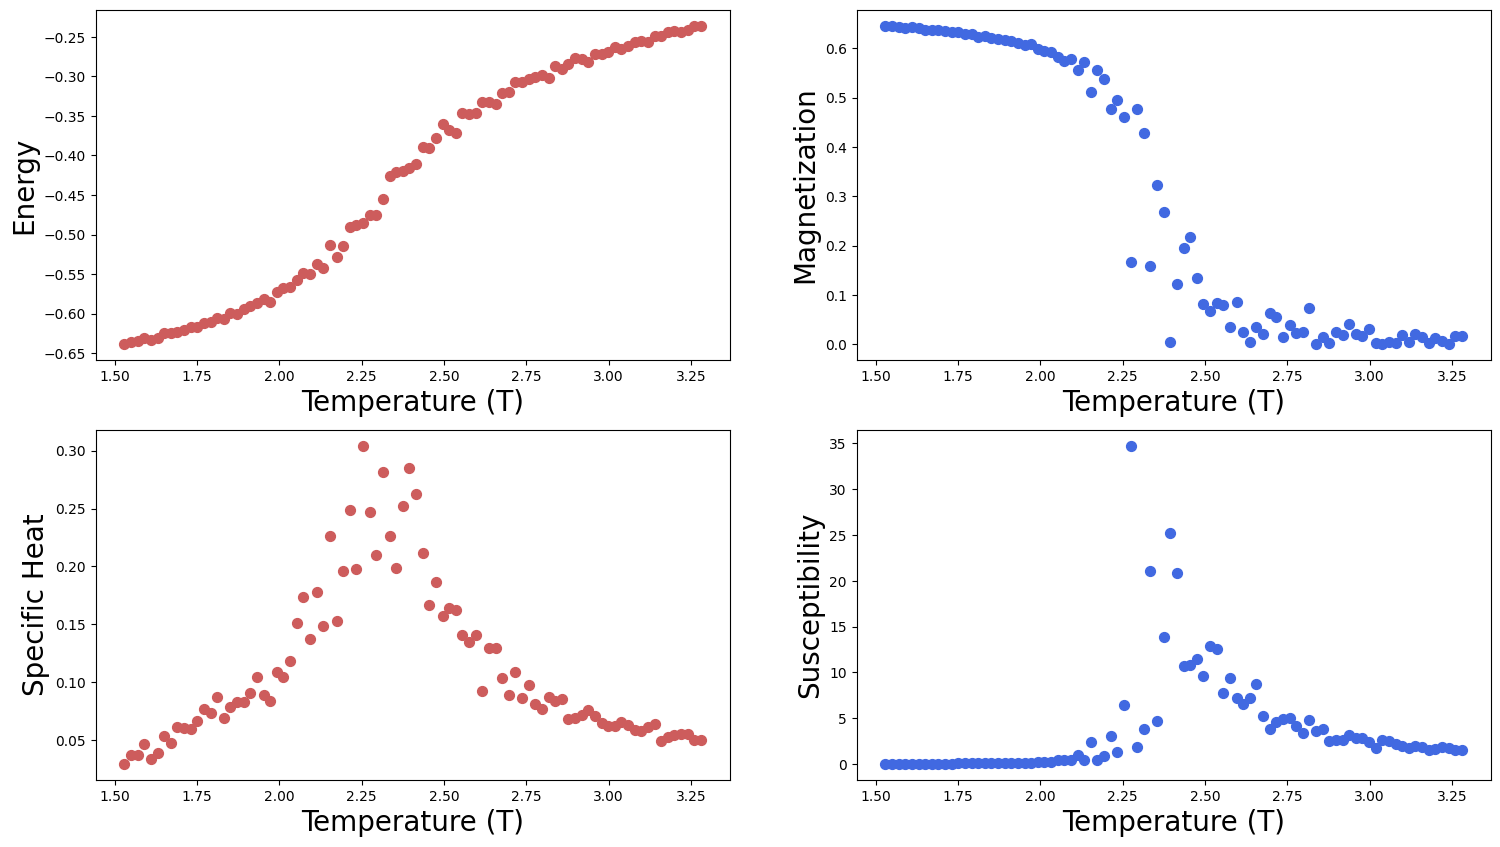

In [13]:
# Plots
plt.figure(figsize=(18, 10))

# Subplot 1: Energy vs Temperature
plt.subplot(2, 2, 1)
plt.scatter(temperatures, total_energy/100000, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Energy", fontsize=20)
plt.axis('tight')

# Subplot 2: Magnetization vs Temperature
plt.subplot(2, 2, 2)
plt.scatter(temperatures, np.abs(total_magnetization/100000), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Magnetization", fontsize=20)
plt.axis('tight')

# Subplot 3: Specific Heat vs Temperature
plt.subplot(2, 2, 3)
plt.scatter(temperatures, total_energy_squared/100000, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Specific Heat", fontsize=20)
plt.axis('tight')

# Subplot 4: Susceptibility vs Temperature
plt.subplot(2, 2, 4)
plt.scatter(temperatures, total_magnetization_squared/100000, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Susceptibility", fontsize=20)
plt.axis('tight')

# Show the plots
plt.show()


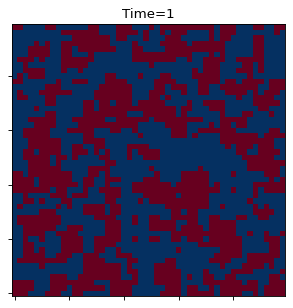

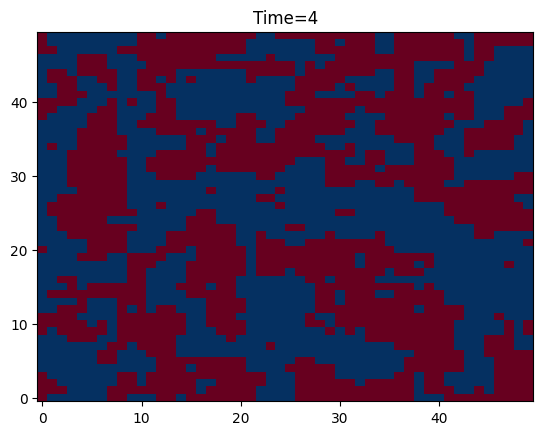

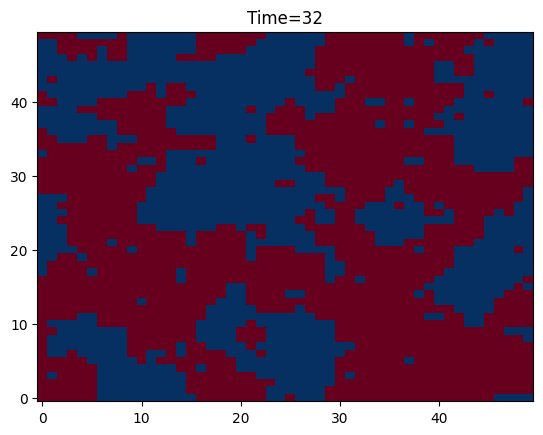

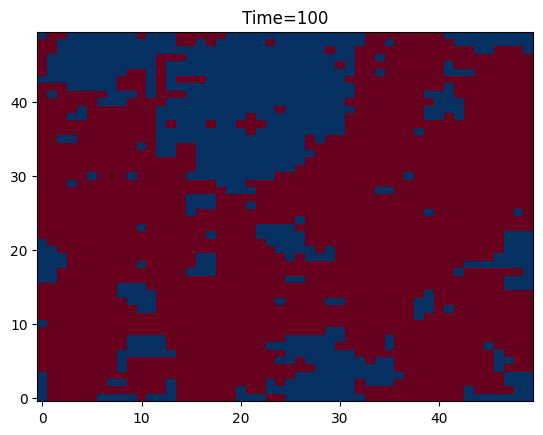

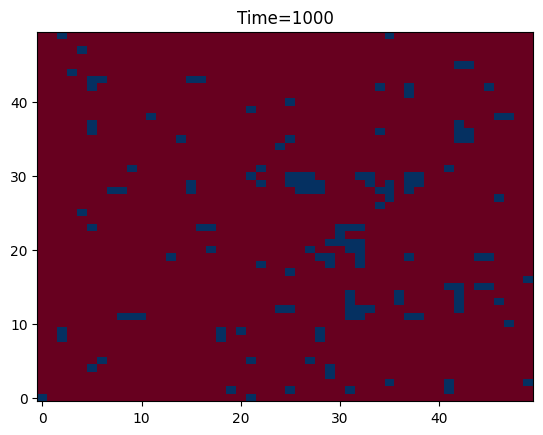

In [23]:
class IsingSimulation:
    def __init__(self, size, temperature):
        """Initialize the IsingSimulation object with a random spin configuration."""
        self.size = size
        self.temperature = temperature
        # Generate a random spin configuration with values -1 or 1
        self.config = 2 * np.random.randint(2, size=(size, size)) - 1

    def mcmove(self):
        """Perform a Monte Carlo move using the Metropolis algorithm."""
        for i in range(self.size):
            for j in range(self.size):
                a = np.random.randint(0, self.size)
                b = np.random.randint(0, self.size)
                s = self.config[a, b]
                nb = (
                    self.config[(a + 1) % self.size, b]
                    + self.config[a, (b + 1) % self.size]
                    + self.config[(a - 1) % self.size, b]
                    + self.config[a, (b - 1) % self.size]
                )
                cost = 2 * s * nb
                # Flip the spin if the cost is negative or with a probability based on the Boltzmann factor
                if cost < 0 or np.random.rand() < np.exp(-cost / self.temperature):
                    s *= -1
                self.config[a, b] = s

    def simulate(self, num_measurements):
        """Simulate the Ising model for a specified number of measurements."""
        figure = plt.figure(figsize=(15, 15), dpi=80)
        for i in range(num_measurements):
            self.mcmove()
            if i in [1, 4, 32, 100, 1000]:
                self.config_plot(figure, i)

    def config_plot(self, figure, i):
        """Plot the spin configuration at specific time steps."""
        X, Y = np.meshgrid(range(self.size), range(self.size))
        subplot = figure.add_subplot(3, 3, i % 9 + 1)
        plt.setp(subplot.get_yticklabels(), visible=False)
        plt.setp(subplot.get_xticklabels(), visible=False)
        plt.pcolormesh(X, Y, self.config, cmap=plt.cm.RdBu)
        plt.title('Time=%d' % i)
        plt.axis('tight')
        plt.show()


# Example usage
ising_sim = IsingSimulation(size=50, temperature=2.0)
ising_sim.simulate(num_measurements=10000)
plt.show()


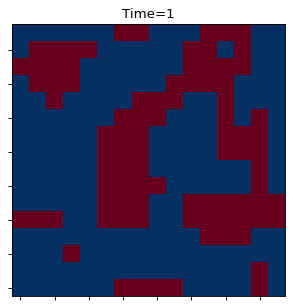

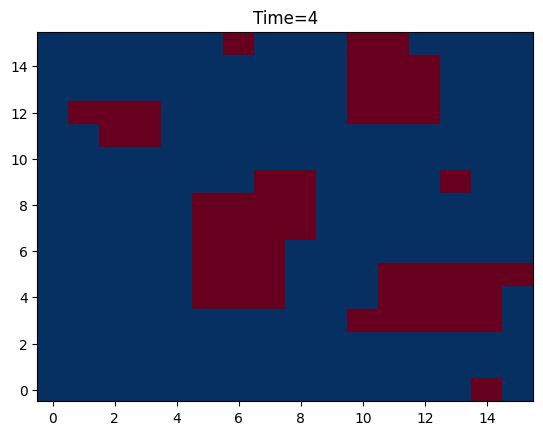

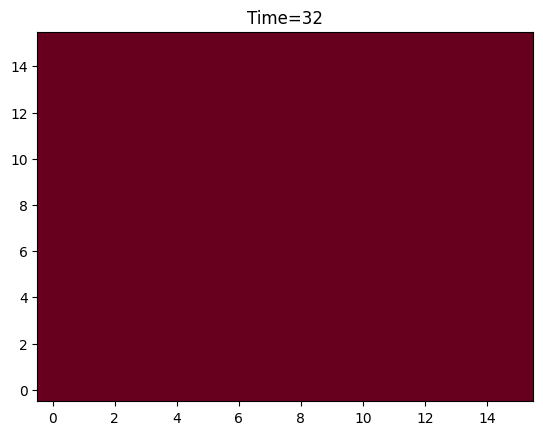

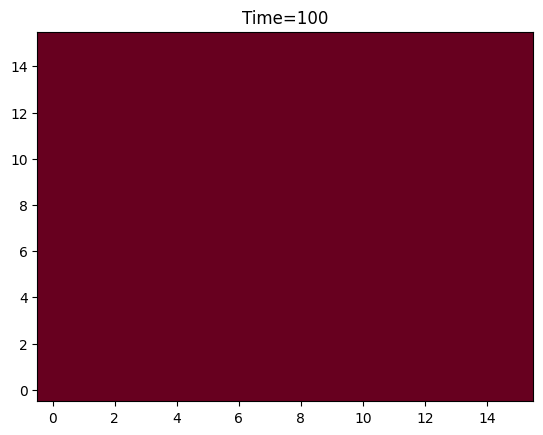

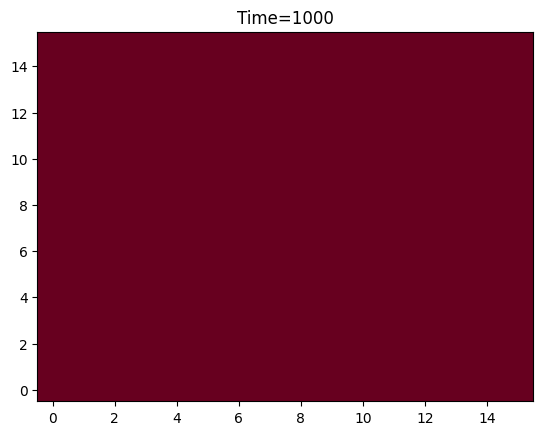

In [24]:
# Example usage
size_of_lattice = 16
initial_temperature = 0.4
num_measurements = 1001

ising_sim = IsingSimulation(size_of_lattice, initial_temperature)
ising_sim.simulate(num_measurements)